In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

pd.set_option('max_colwidth', 1000)
pd.set_option('display.max_rows', 999)
plt.style.use('ggplot')

# thoughts:
# * include more thatn 200 words (or 200 from start 200 from end)

In [71]:
# read hat scored data
hat_gold_scored_path = 'gs://kaggle-model-experiments/keras_runs/ericagreene/20180517_125720/4/gold_hat_scored.csv'
mean_gold_scored_path = 'gs://kaggle-model-experiments/keras_runs/ericagreene/20180517_125716/3/gold_mean_scored.csv'

df_hat = pd.read_csv(tf.gfile.Open(hat_gold_scored_path, 'r'))
df_mean = pd.read_csv(tf.gfile.Open(mean_gold_scored_path, 'r'))

In [72]:
LABELS = ['threat','flirtation', 'identity_hate', 'insult_general', 'insult_personal', 'obscene', 
          'sexual_explicit']

df_all = df_hat.merge(df_mean, on=['_unit_id', 'comment_text', 'gold', 'label', 'name'], suffixes=['_hat', '_mean'])

df_all['gold'] = df_all['gold'].astype('float64')

# split insult into insult_general and insult_personal
df_all['insult_general_mean'] = df_all['insult_mean']
df_all['insult_general_hat'] = df_all['insult_hat']

df_all['insult_personal_mean'] = df_all['insult_mean']
df_all['insult_personal_hat'] = df_all['insult_hat']

def map_label_to_label_subtype(row):
    if row['label'] == 'insult' and row['name'] == 'general':
        return 'insult_general'
    if row['label'] == 'insult' and row['name'] == 'personal':
        return 'insult_personal'    
    return row['label']


df_all['label'] = df_all.apply(map_label_to_label_subtype,  axis=1)
df_all['label'].unique()

array(['obscene', 'threat', 'identity_hate', 'flirtation',
       'insult_general', 'insult_personal', 'sexual_explicit'],
      dtype=object)

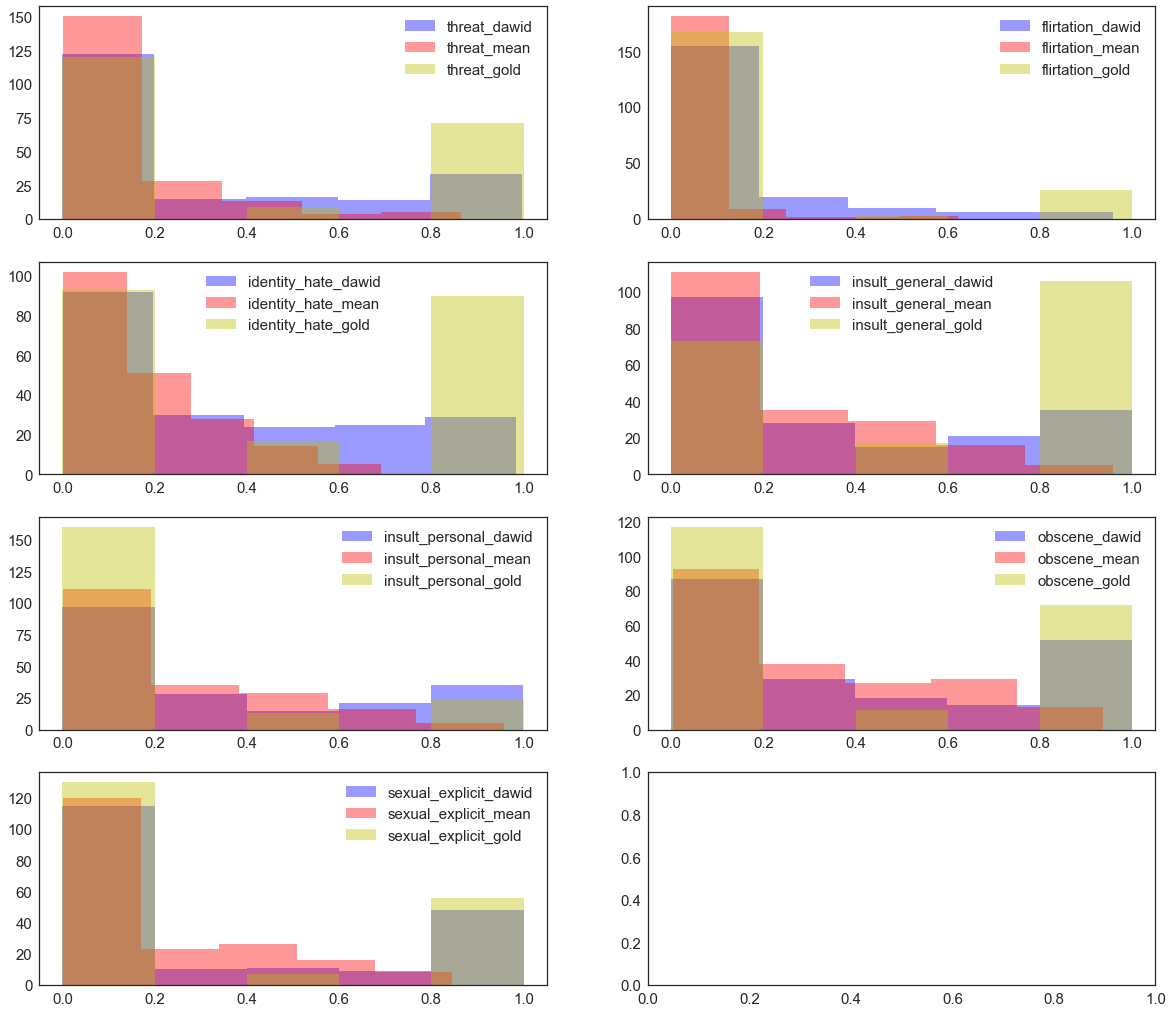

In [73]:
N_BINS=5
sns.set(font_scale=1.5)
sns.set_style("white")


fig, axes = plt.subplots(4, 2, figsize=(20, 18))
counter = 0
for i in range(4):
      for j in range(2):
        if counter == 7:
            continue 
            
        label = LABELS[counter]
        counter += 1
        
        df_label = df_all[df_all['label'] == label]
        
        # plot histogram of ds scores on labeled data
        data = df_label[label + '_hat']
        sns.distplot(data, label=label + '_dawid', bins=N_BINS, 
                         kde=False, ax=axes[i,j], color='b')
    
        # plot histogram of mean scores on labeled data
        data = df_label[label + '_mean']
        sns.distplot(data, label=label + '_mean', bins=N_BINS,
                         kde=False, ax=axes[i,j], color='r')
        
        # plot histogram of gold scores 
        data = df_label['gold']
        sns.distplot(data, label=label + '_gold', bins=N_BINS, 
                     kde=False, ax=axes[i,j], color='y')
        
        axes[i,j].legend()
        axes[i,j].set_xlabel('')

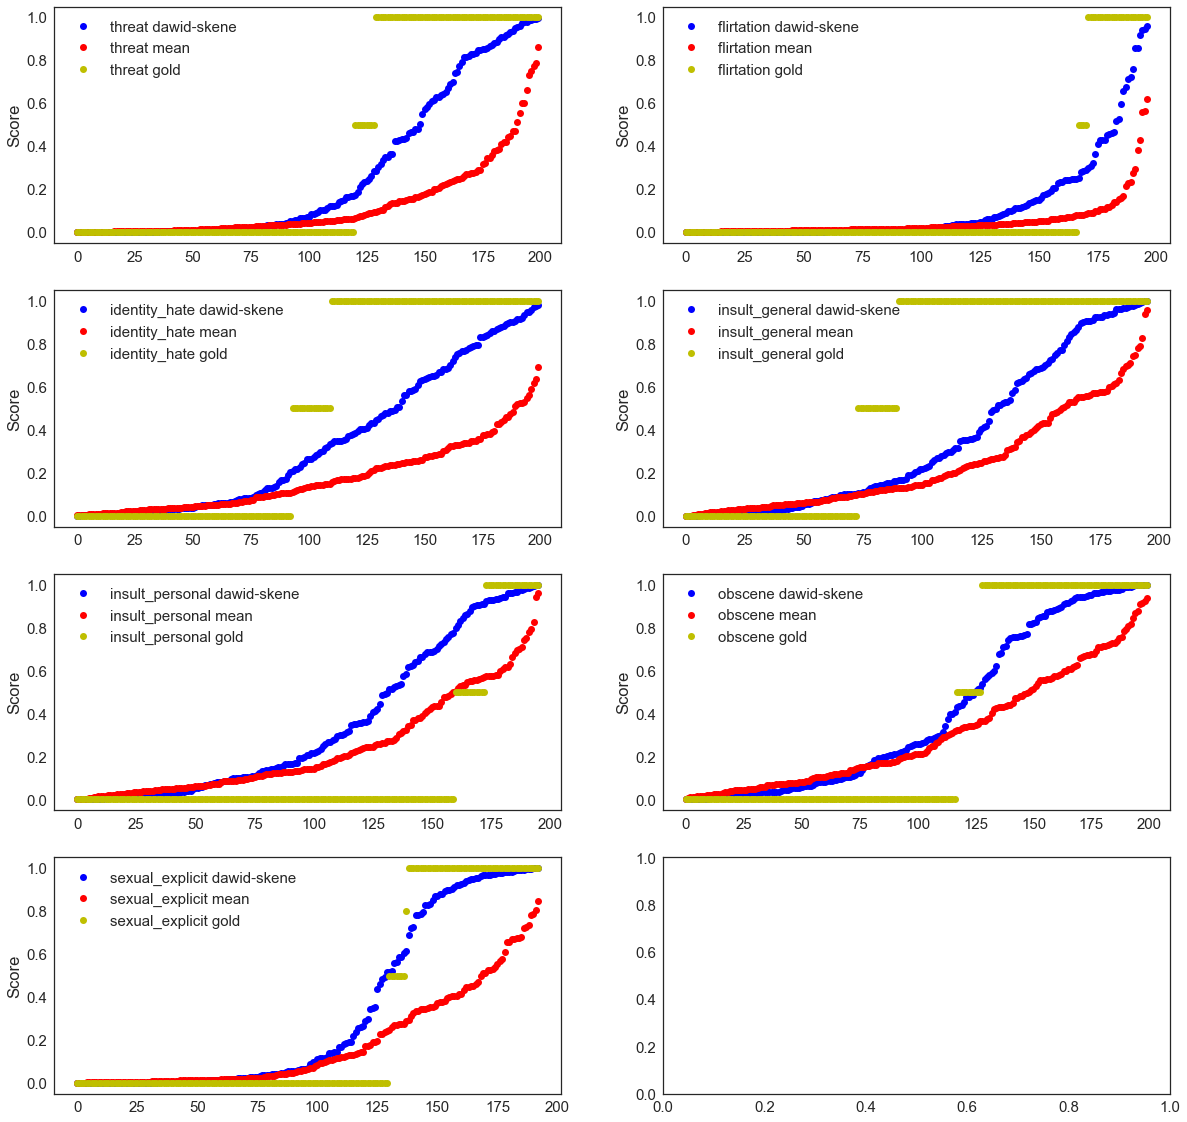

In [74]:
# sorted independently 

N_BINS=5
sns.set(font_scale=1.5)
sns.set_style("white")


fig, axes = plt.subplots(4, 2, figsize=(20, 20))
counter = 0
for i in range(4):
      for j in range(2):
        if counter == 7:
            continue 
            
        label = LABELS[counter]
        counter += 1
        
        df_label = df_all[df_all['label'] == label]

        # plot histogram of ds scores on labeled data
        data = np.array(df_label[label + '_hat'])
        data.sort()
        axes[i,j].plot(range(len(data)), data, 'bo', label=label + ' dawid-skene')
    
        # plot histogram of mean scores on labeled data
        data = np.array(df_label[label + '_mean'])
        data.sort()
        axes[i,j].plot(range(len(data)), data, 'ro', label=label + ' mean')
        
        # plot histogram of gold scores 
        data = np.array(df_label['gold'])
        data.sort()
        axes[i,j].plot(range(len(data)), data, 'yo', label=label + ' gold')
        
        axes[i,j].legend()
        axes[i,j].set_xlabel('')
        axes[i,j].set_ylabel('Score')

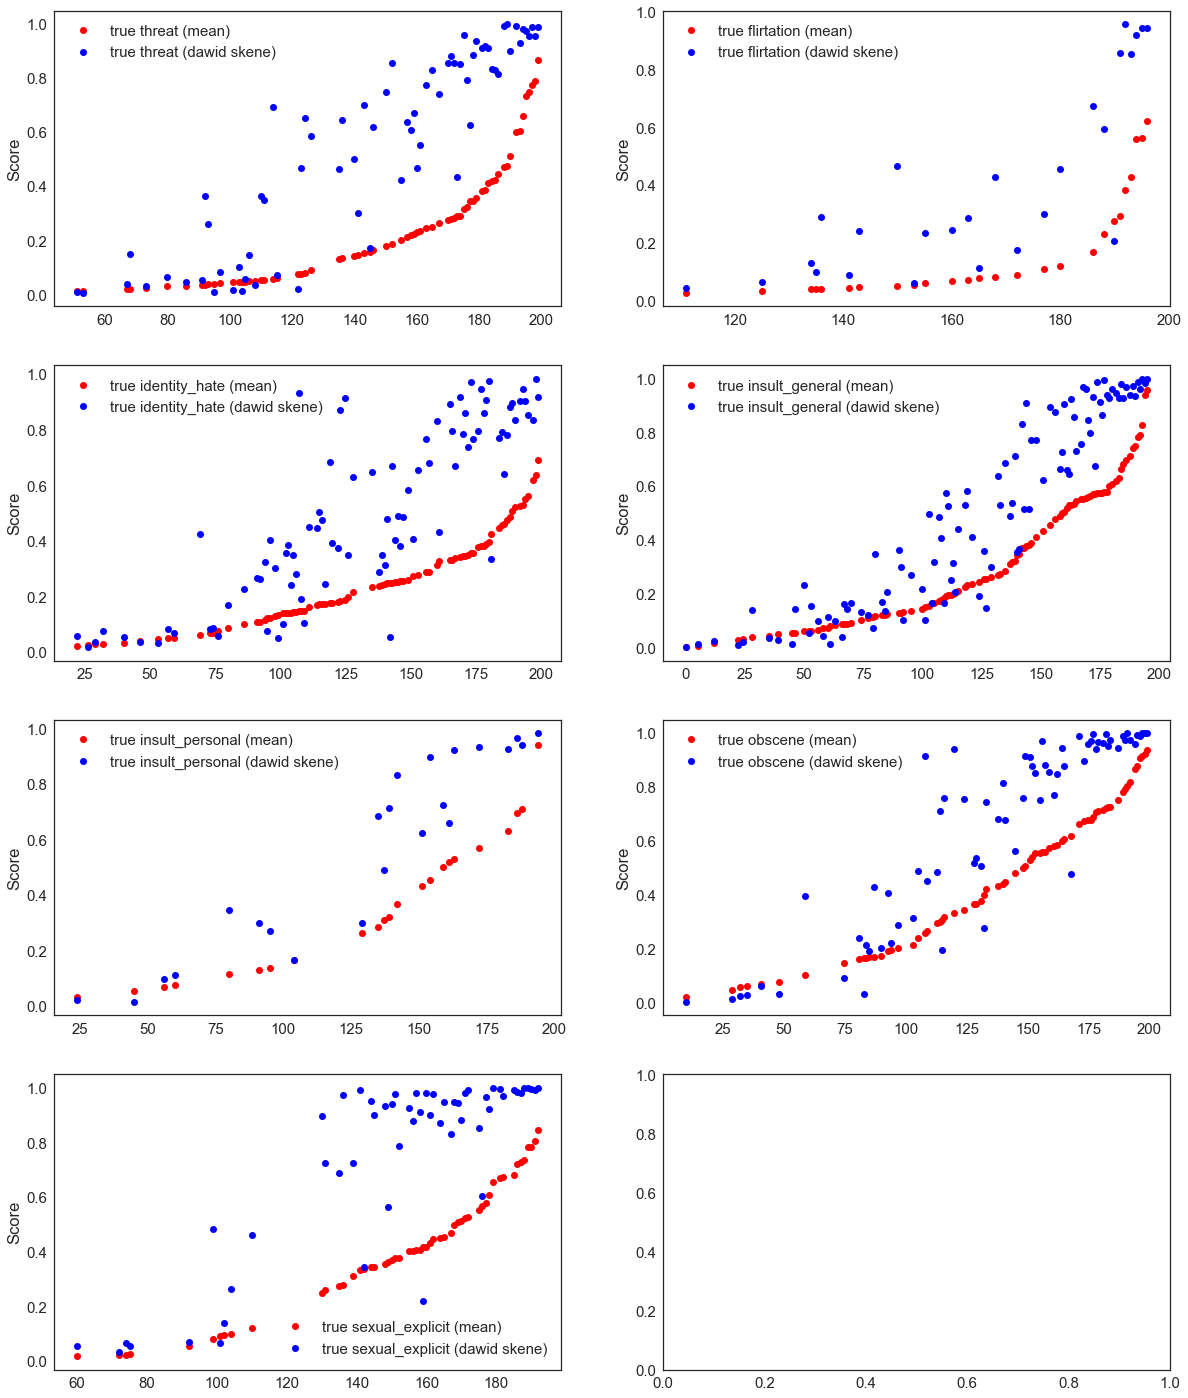

In [75]:
sns.set(font_scale=1.5)
sns.set_style("white")

fig, axes = plt.subplots(4, 2, figsize=(20, 25))
counter = 0
for i in range(4):
      for j in range(2):
        if counter == 7:
            continue 
            
        label = LABELS[counter]
        counter += 1
        
        df_label = df_all[df_all['label'] == label]

        # plot true mean model examples 
        label_model = label + '_mean'
        df_label = df_label.sort_values(by=[label_model])
        df_label['index'] = range(len(df_label))
        
        data = df_label[df_label['gold'] == 1]      
        axes[i,j].plot(data['index'], data[label + '_mean'], 'ro', 
                       label='true ' + label + ' (mean)')
       
        # plot true mean model examples 
        label_model = label + '_hat'
        data = df_label[df_label['gold'] == 1]      
        axes[i,j].plot(data['index'], data[label + '_hat'], 'bo', 
                        label='true ' + label + ' (dawid skene)')

            
        axes[i,j].legend()
        axes[i,j].set_title = 'Mean Label Model'
        axes[i,j].set_xlabel('')
        axes[i,j].set_ylabel('Score')
        
        
        


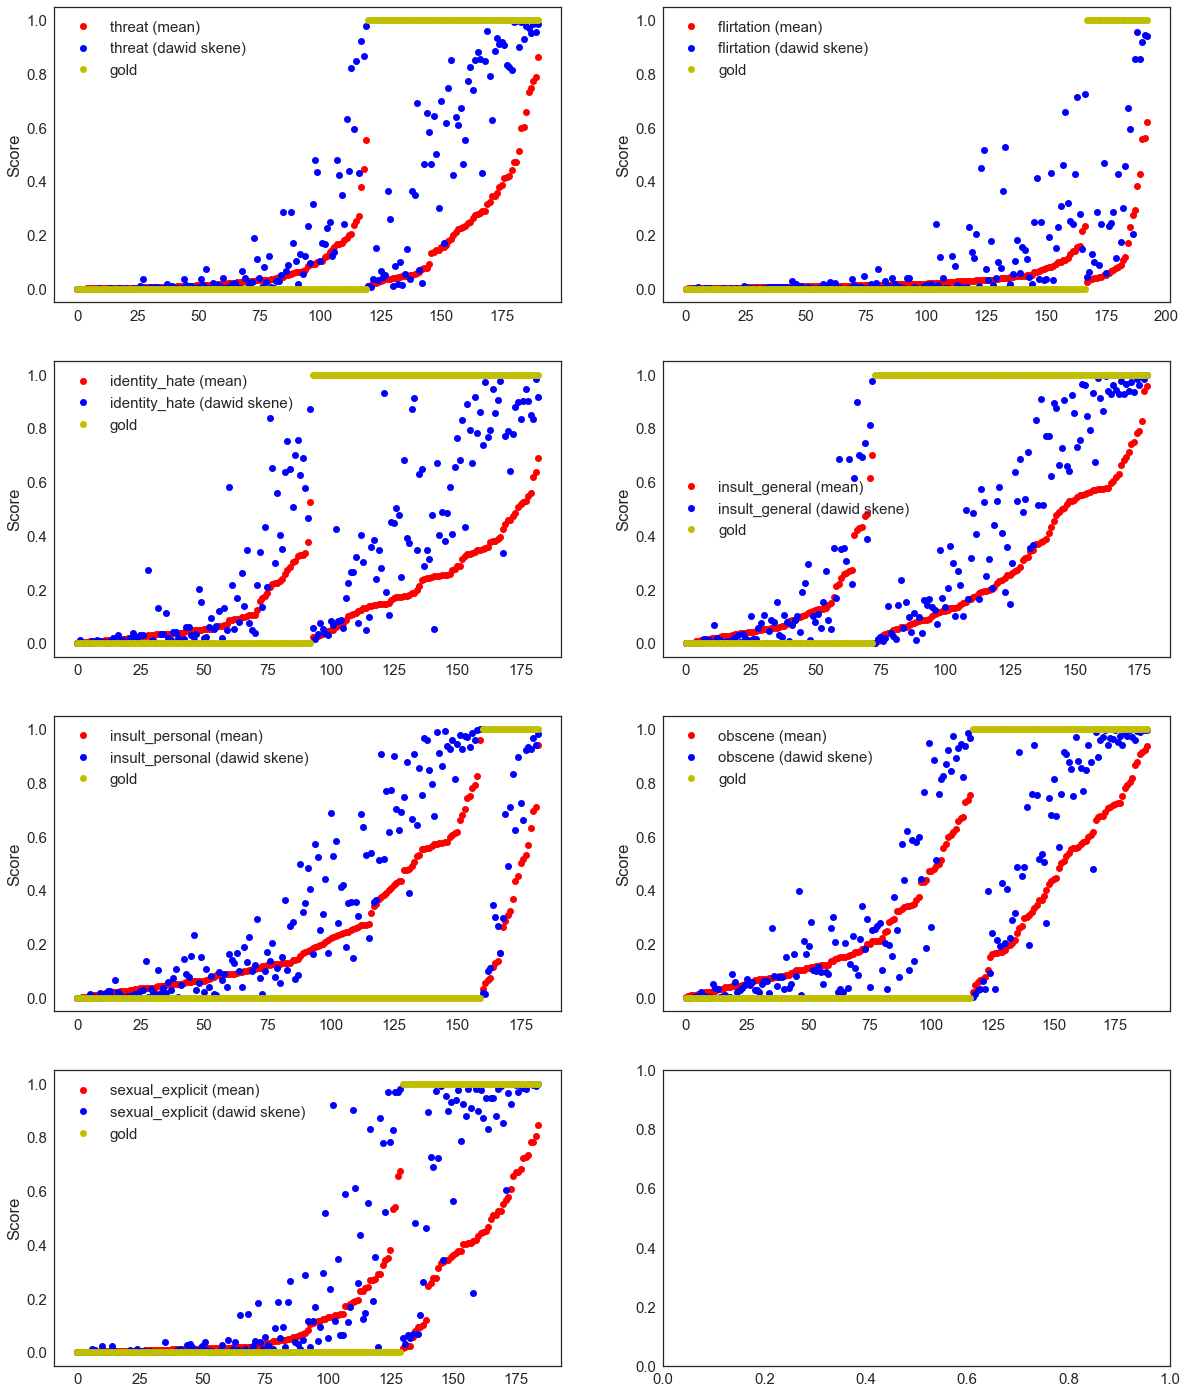

In [80]:
sns.set(font_scale=1.5)
sns.set_style("white")

fig, axes = plt.subplots(4, 2, figsize=(20, 25))
counter = 0
for i in range(4):
      for j in range(2):
        if counter == 7:
            continue 
            
        label = LABELS[counter]
        counter += 1
        
        df_label = df_all[(df_all['label'] == label) & (df_all['gold'].isin([0,1]))]

        # plot true mean model examples 
        df_label = df_label.sort_values(by=['gold', label + '_mean'])
        df_label['index'] = range(len(df_label))
        
        axes[i,j].plot(df_label['index'], df_label[label + '_mean'], 'ro', 
                       label=label + ' (mean)')
       
        # plot true mean model examples 
        axes[i,j].plot(df_label['index'], df_label[label + '_hat'], 'bo', 
                        label=label + ' (dawid skene)')
        
        # plot gold examples
        axes[i,j].plot(df_label['index'], df_label['gold'], 'yo', 
                        label='gold')

            
        axes[i,j].legend()
        axes[i,j].set_title = 'Mean Label Model'
        axes[i,j].set_xlabel('')
        axes[i,j].set_ylabel('Score')

# calibration 

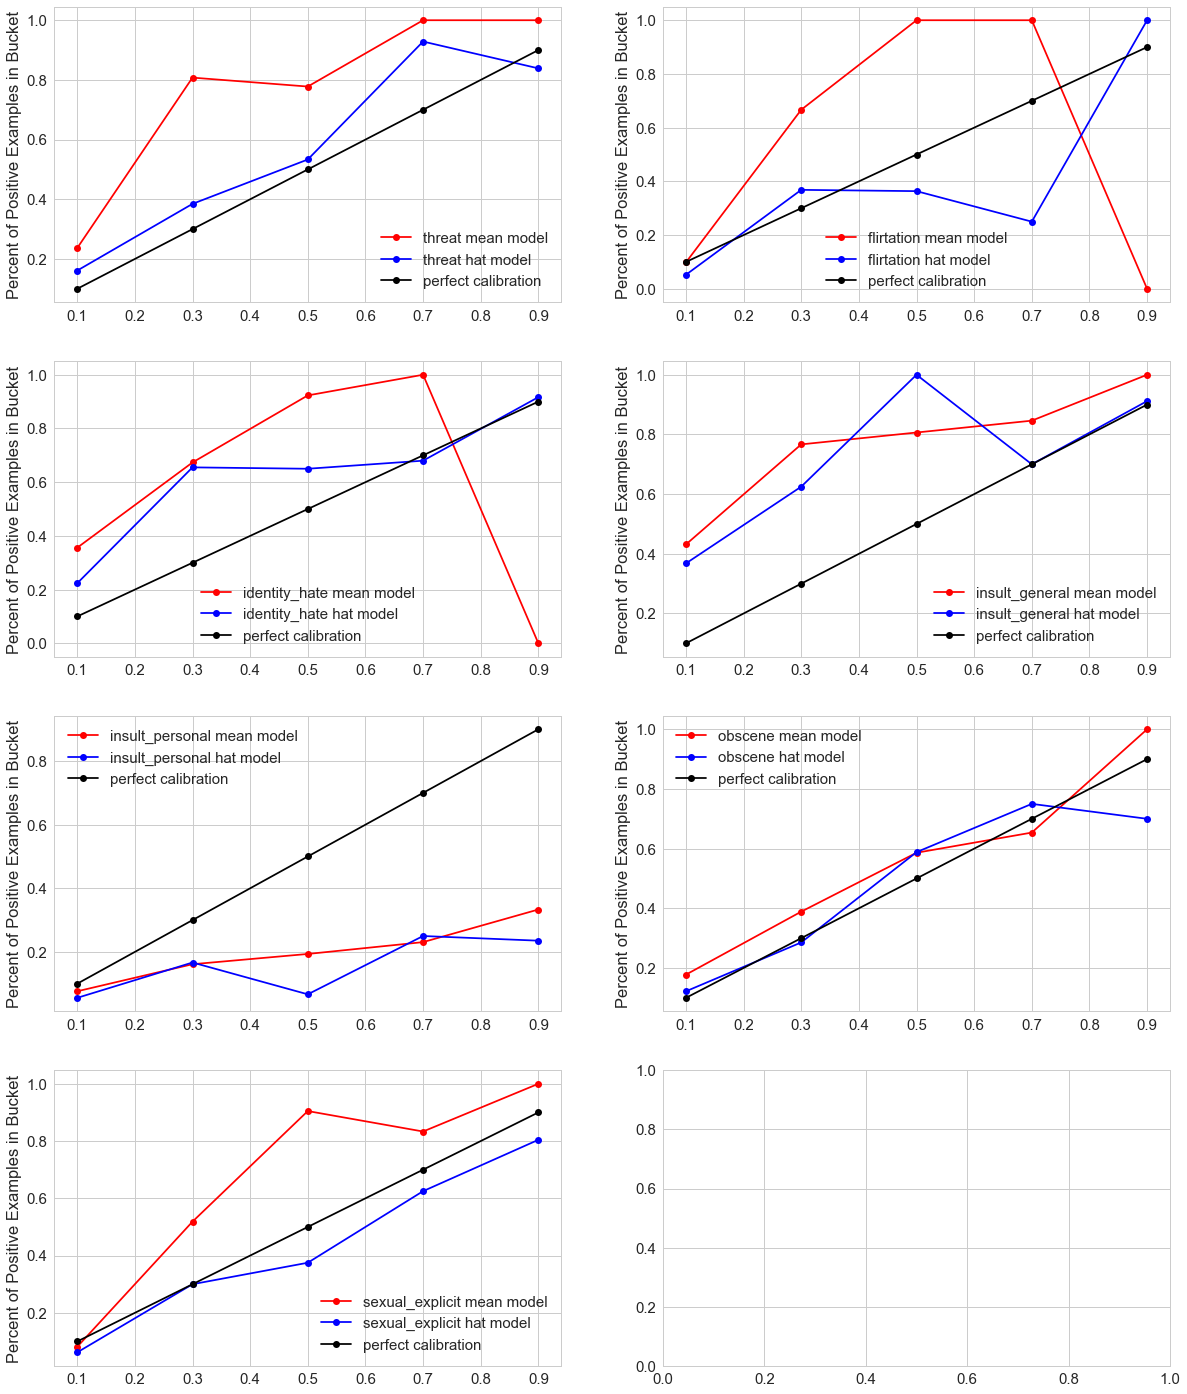

In [68]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

fig, axes = plt.subplots(4, 2, figsize=(20, 25))
counter = 0
for i in range(4):
      for j in range(2):
        if counter == 7:
            continue 
            
        label = LABELS[counter]
        counter += 1
        
        df_label = df_all[(df_all['label'] == label) & (df_all['gold'].isin([0,1]))]
        df_mean = df_label[label + '_mean']
        df_hat = df_label[label + '_hat']
        
        cutoffs = [0, .2, .4, .6, .8, 1]
        mid_cutoffs = [(cutoffs[k] + cutoffs[k + 1]) / 2.0 for k in range(len(cutoffs) - 1)]
        mean_scores = np.zeros(len(cutoffs) - 1)
        hat_scores = np.zeros(len(cutoffs) - 1)

        for c in range(len(cutoffs) - 1):
            df_mean = df_label[(df_label[label + '_mean'] >= cutoffs[c]) & (df_label[label + '_mean'] < cutoffs[c+1])]
            df_hat = df_label[(df_label[label + '_hat'] >= cutoffs[c]) & (df_label[label + '_hat'] < cutoffs[c+1])]
            
            if len(df_mean) == 0:
                mean_scores[c] = 0
            else:
                mean_scores[c] = len(df_mean[df_mean['gold'] == 1]) / float(len(df_mean))
                
            if len(df_hat) == 0:
                hat_scores[c] = 0
            else:
                hat_scores[c] = len(df_hat[df_hat['gold'] == 1]) / float(len(df_hat))
            
        axes[i,j].plot(mid_cutoffs, mean_scores, 'r-', label=label + ' mean model', marker='o')
        axes[i,j].plot(mid_cutoffs, hat_scores, 'b-', label=label + ' hat model', marker='o')
        axes[i,j].plot(mid_cutoffs, mid_cutoffs, 'k-', label='perfect calibration', marker='o')

        
        axes[i,j].legend()
        axes[i,j].xticks = cutoffs
        axes[i,j].set_title = 'Mean Label Model'
        axes[i,j].set_xlabel('')
        axes[i,j].set_ylabel('Percent of Positive Examples in Bucket')
